<!DOCTYPE html>
<html>
<head>
    <title>Haseebullah Kehar</title>
</head>
<body>
    <h1>Author: Haseebullah Kehar</h1>
</body>
</html>


**You will learn following**

1.Loading the dataset\
2.Preprocessing the dataset\
3.Define the Neural Network\
4.Training a Neural Network\
5.Testing a Neural Network

**Loading Required packages and Data**

In [7]:
# Import necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


**Data Splitting**

In [8]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


**Normalization**

In [9]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

**Class Names**

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

**Define the Model**

**Using Flatten, 3 dense layers of 512, 256 and 10 Neurons**

In [11]:
# Build a simple ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  #Flatten the input image
    layers.Dense(512, activation='relu'),     #First dense layer with 512 units
    layers.Dense(256, activation='relu'),     #Second dense layer with 256 units
    layers.Dense(10,  activation='softmax')   #Output slayer with 10 units (one for each class)
])

**Model Compilation**

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [1]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

**Model Evaluation**

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - loss: 1.4664 - accuracy: 0.4861 - 2s/epoch - 6ms/step

Test accuracy: 0.4860999882221222


**Data Visualization**

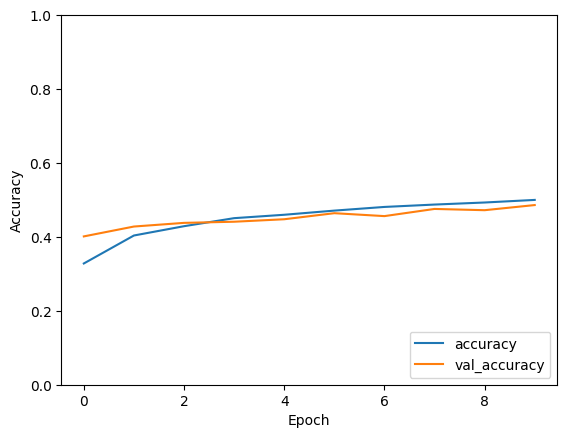

In [20]:
# plot training and validation acuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**Model Prediction**

In [22]:
# Predict the first 5 images in the test set
predictions = model.predict(x_test[:5])

1/1 [==============================] - 0s 398ms/step


**Display the Predictions**

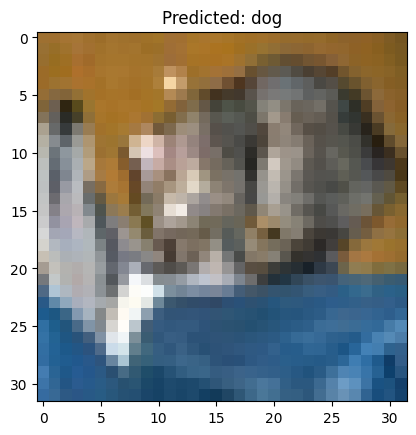

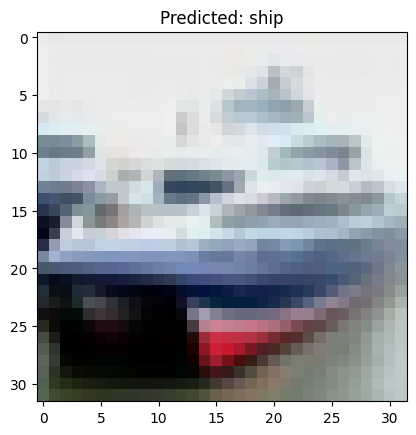

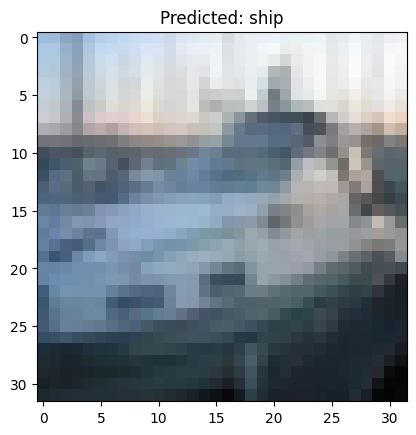

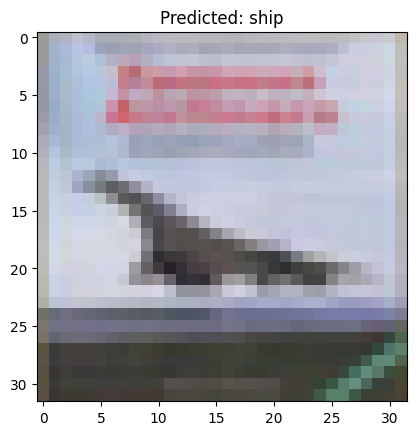

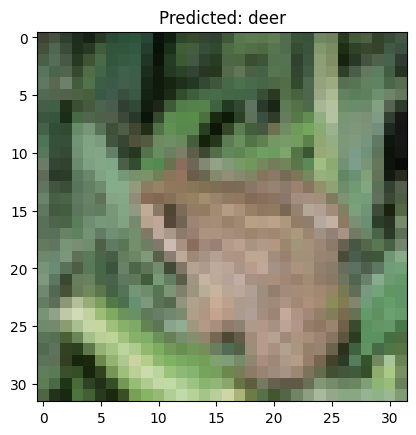

In [24]:
for i in range(5):
  plt.figure()
  plt.imshow(x_test[i])
  plt.title(f'Predicted: {class_names[predictions[i].argmax()]}')